In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn

### Dataset for linear regression

In [2]:
# creating a column matrix of 50 linearly spaced elements
X = torch.linspace(1, 50, 50).reshape(-1, 1)
print(X)

tensor([[ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.],
        [11.],
        [12.],
        [13.],
        [14.],
        [15.],
        [16.],
        [17.],
        [18.],
        [19.],
        [20.],
        [21.],
        [22.],
        [23.],
        [24.],
        [25.],
        [26.],
        [27.],
        [28.],
        [29.],
        [30.],
        [31.],
        [32.],
        [33.],
        [34.],
        [35.],
        [36.],
        [37.],
        [38.],
        [39.],
        [40.],
        [41.],
        [42.],
        [43.],
        [44.],
        [45.],
        [46.],
        [47.],
        [48.],
        [49.],
        [50.]])


In [3]:
# creating a random array of error values of the same shape of the X column matrix (50,1)
torch.manual_seed(71)
e = torch.randint(-8, 9, (50,1), dtype=torch.float)
print(e)

tensor([[ 2.],
        [ 7.],
        [ 2.],
        [ 6.],
        [ 2.],
        [-4.],
        [ 2.],
        [-5.],
        [ 4.],
        [ 1.],
        [ 2.],
        [ 3.],
        [ 1.],
        [-8.],
        [ 5.],
        [ 5.],
        [-6.],
        [ 0.],
        [-7.],
        [-8.],
        [-3.],
        [-1.],
        [ 2.],
        [-6.],
        [-3.],
        [ 3.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 1.],
        [ 7.],
        [ 6.],
        [-1.],
        [-6.],
        [-5.],
        [-3.],
        [ 7.],
        [ 0.],
        [ 8.],
        [-1.],
        [-2.],
        [ 2.],
        [-8.],
        [-1.],
        [ 6.],
        [-8.],
        [-3.],
        [-7.],
        [-2.]])


In [4]:
# creating a tensor y(x) = 2*x + 1 plus an random error e (noise)
y = 2*X + 1 + e
y.shape

torch.Size([50, 1])

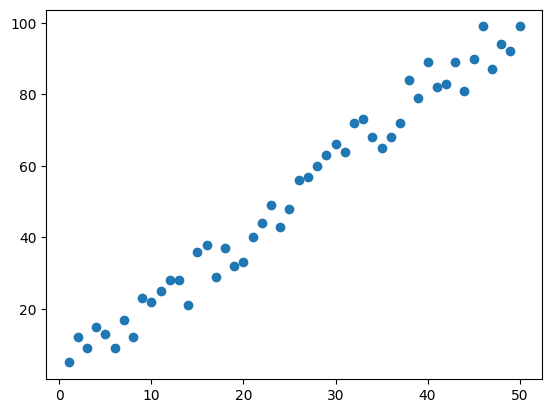

In [5]:
# in order to plot, first convert the tensors into numpy arrays
plt.scatter(X.numpy(), y.numpy())

### Training algorithm for linear regression

In [6]:
torch.manual_seed(59)

In [7]:
class Model(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__() #inherits the constructor method of the superior object (nn.Module)
        self.linear = nn.Linear(in_features, out_features) # the type of neural network layer that is employed here: Linear is a fully connected or Dense layer 
    
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

In [8]:
torch.manual_seed(59)

model = Model(1,1) # one simple feature x, one simple out feature y
print(model.linear.weight)
print(model.linear.bias)

Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)


In [9]:
# setting the loss function: mean square error loss (the target function for the optimization)
criterion = nn.MSELoss()
print(criterion.type)

<bound method Module.type of MSELoss()>


In [10]:
# setting the learning rate as stochastic gradient descend, learning rate, lr = 0.01
# this is used to update the weights and biases 
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [11]:
# epochs: entire pass or entire processing of the dataset that ends updating the biases and weights of the network. With this update, the next epoch will be closer and closer to the optimization. In order to reach an optimum number of epochs we need to track the losses
epochs = 25
losses = []
for epoch in range(epochs):
    epoch += 1
    
    # prediction of y (forward pass)
    y_pred = model.forward(X)
    
    # calculate the loss (error)
    loss = criterion(y_pred, y)
    
    # record the error
    losses.append(loss.detach().numpy())
    
    print(f'epoch: {epoch}, loss: {loss.item()}, weight: {model.linear.weight.item()}, bias {model.linear.bias.item()}')
    
    #to prevent the accumulation of the gradients steps in the next epoch
    #starting "fresh" for the next epoch
    optimizer.zero_grad()
    
    #find the derivatives with respect to the loss function (backward step)
    loss.backward()
    
    #updating the weights and biases
    optimizer.step()

epoch: 1, loss: 3057.216796875, weight: 0.10597813129425049, bias 0.9637961387634277
epoch: 2, loss: 1588.5311279296875, weight: 3.334900379180908, bias 1.0604636669158936
epoch: 3, loss: 830.2999877929688, weight: 1.0148327350616455, bias 0.9922628402709961
epoch: 4, loss: 438.8524169921875, weight: 2.6817996501922607, bias 1.0425218343734741
epoch: 5, loss: 236.7615203857422, weight: 1.4840211868286133, bias 1.0076650381088257
epoch: 6, loss: 132.4291229248047, weight: 2.3446059226989746, bias 1.0339646339416504
epoch: 7, loss: 78.56572723388672, weight: 1.7262253761291504, bias 1.0163217782974243
epoch: 8, loss: 50.75775909423828, weight: 2.170504093170166, bias 1.0302516222000122
epoch: 9, loss: 36.4012565612793, weight: 1.851245641708374, bias 1.0214954614639282
epoch: 10, loss: 28.989229202270508, weight: 2.0806007385253906, bias 1.029038906097412
epoch: 11, loss: 25.162382125854492, weight: 1.9157683849334717, bias 1.0248701572418213
epoch: 12, loss: 23.186473846435547, weight: 

Text(0.5, 0, 'Epoch')

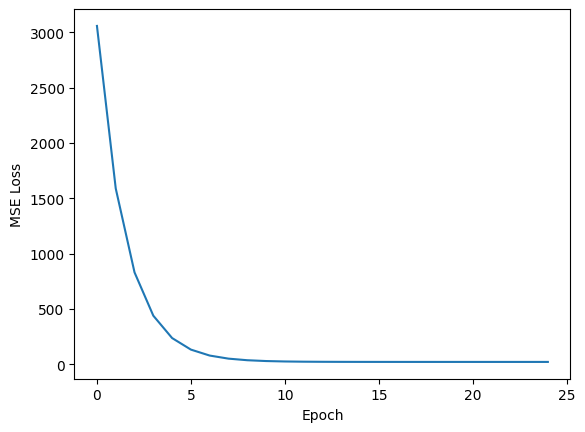

In [12]:
plt.plot(range(epochs), losses)
plt.ylabel('MSE Loss')
plt.xlabel('Epoch')

In [13]:
x = np.linspace(0, 50, 50)
current_weight = model.linear.weight.item()
current_bias = model.linear.bias.item()
predicted_y = current_weight*x + current_bias

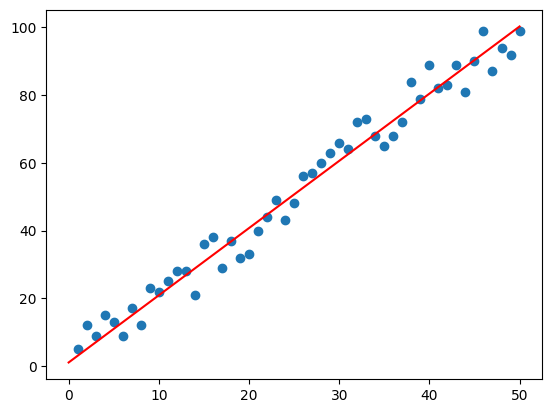

In [14]:
plt.scatter(X.numpy(), y.numpy())
plt.plot(x, predicted_y, 'r')